# Design of Experiments

Lets say you are trying to find a new material with a certain combination of organic ligand and metal salt. You have some idea of what the compound may looks like (3D, layered, perhaps the approximate stoichiometry...) and from the literature you've found that other have made similar things in the past from which you can make a guess of what some of the other reaction conditions may be (temperature profiles, solvents used, reaction concentrations, reagent purification steps, exclusion of air from reaction, stirring rate, method of reagent mixing...). Together all of this information defines a **reaction space**. 

Reaction spaces can be very large and navigating them efficiently is a challenge. As a synthetic chemist focused on materials discovery the energetics that govern spontaneity, metastability, and product selectivity can be quite subtle is difficult to predict. Over time with experience and a better understanding of your compounds solubilities, reactivity, and stability you'll learn to make better hypotheses about what will work and what won't. But even with this experience you will encounter a great many failures as well as find a few surprises along the way. Though careful planning and a bit of luck you can find a new material that is interesting and useful.

_Design of Experiments_ (DoE) is a framework for planning experiments that is used in many fields of science and engineering that doesn't require the experiment to know anything about the fundamental chemistry of their system. For this reason, leaning purely on DoE to plan your experiments is not a good idea. It is often times inefficient, redundant, and dangerous. However, DoE can be a powerful tool to help you explore a reaction space efficiently and to help you optimize conditions to make your material, and to make sure you leave no stone unturned. DoE is a systematic approach to planning experiments that allows you to efficiently explore a reaction space. It is a powerful tool for synthetic chemists and materials scientists.

## An illustrative example

Consider the following example. You are trying to make a new material using solution phase chemistry with a generic formula $\ce{A2BB^\prime X6}$, where A is a monocation (*e.g.* $\ce{Cs+}$, $\ce{H3CNH3+}$, or $\ce{H3C(CH2)3NH3+}$), $B$ is a monovalent metal cation ($\ce{Cu+, Ag+}$), and $\ce{B^\prime}$ is a trivalent metal cation ($\ce{Tl^3+}$, $\ce{Sb^3+}$, $\ce{Bi^3+}$), and X is a halide ($\ce{F-, Cl-, Br-, I-}$). The forumla $\ce{A2BB^\prime X6}$ is the composition of double perovskite and important class of materials for which >90,000 as of yet undiscovered materials have been predicted to be stable. However in this example we are only interested in an very small number of these possible materials that contain the metal cations $\ce{Cu+, Ag+, \ce{Tl^3+}, \ce{Sb^3+}, and \ce{Bi^3+}}$ and a halide. 

With 3 $A$-sites, 2 $B$-sites, 3 $B^\prime$-sites, and 4 $X$-sites there are 72 possible combinations of these cations that can be made. However, not all of these combinations are stable and we don't know which of these we can actually form experimentally. By reading the literature and learning what has worked in the past and what similar materials have already been made we can likely reduced our initial list of 72 targets compounds to a much smaller list of ~10 compounds. But for know we'll start with the DoE purist approach and avoid eliminating any target compounds from our list prematurely.

Unfortunately we cannot just add ions to a pot and have them form phase pure compound. They need to be a part of a stable compound. In the simplest solid state reactions the next easiest thing can be done which is to just combine the elements in the desired proportions. But most metallic elements are not very reactive with eachother and will prefer to form simple salts or alloys which combined with other elements directly. Instead we will leverage the more sophisticated chemistry of solution phase reactions to make our compounds, which means we need to start with metal salts. Here is an initial list of all the metal salts we need to completely cover our reaction space:

* $A$-site: (4 halides $\times$ 3 cations = 12 salts) $\ce{CsF}, \ce{CsCl},\ce{CsBr},\ce{CsI}$ $\ce{H3CNH3F}, \ce{H3CNH3Cl},\ce{H3CNH3Br},\ce{H3CNH3I},$ $\ce{H3C(CH2)3NH3F}, \ce{H3C(CH2)3NH3Cl},\ce{H3C(CH2)3NH3Br},\ce{H3C(CH2)3NH3I},$
* $B$-site: (4 halides $\times$ 2 cations = 8 salts) (*e.g.* $\ce{AgBr}$)
* $B^\prime$-site: (4 halides $\times$ 3 cations = 12 salts) (*e.g.* $\ce{BrBr3}$)
* $X$-site: determined by other salts (0 choices)

Naively, we'll need 32 different metal salts. If we only want a single halide in the product again the number of combinations ween need to try will be 72. We also need a solvent for these reactions and we may need to control the pH by adding additional acid. Since we're adding solvent we also must select a concentration. We'll track concentration as the total of all dissolved salts ($AX$, $BX$, and $\ce{B^\prime X3}$). After a few quick tests in the lab a reasonable concentration range can be determined for each solvent/salt paring. For now we'll assume the same concentration range for all solvents and update if later if needed. Finally the stoichiometry of the solutions we make may need to be different from the stoichiometry of the product we want. For example, if we want to make $\ce{Cs2AgBiBr6}$ has 2:1:1 ratio of the $AX$, $BX$, and $\ce{B^\prime X3}$ in order for is to selectively precipitate  the solution may need to have excess $AX$ salt. So other stoichiometries are also be worth considering. 

* mol equivalents of HX added per mol of product: [0, 1, 2, 3,] 
* Candidate solvents [water, ethanol, methanol, DMF, NMP, 1:1 water:ethanol, 1:1 water:methanol]
* Total concentration in molarity [0.1, 0.4, 0.8, 1, 1.2]
* Stoichiometry: [1:1:1, 1:1:2, 1:2:2, 2:2:1, 2:1:1, 4:1:1]

Other variables may also be important including the temperature, reaction time, the total reaction volume, the order of addition, and the rate of addition, the material the reaction vessel is made of, the presence of oxygen, the humidity of the lab. But just do our best to keep those constant for now. Already we have identified $72 \times 4 \times 7 \times 5 \times 6$ experiments worth trying. **That's 60,480 experiments!** If we can do 10 experiments a day that's over 16 years of work. And that's assuming we don't have to repeat any experiments, or change the temperature.

## Partial sampling of a large reaction space

Fortunately, you'll find that after running a few reactions the number worth running quickly diminishes with some simple inference. For example if after running at 4 eq of Ag and Bi we find a large excess of unreacted Ag in the product mixture then we probably don't need to run any conditions at 5 or 6 eq or Ag at the same or high concentrations. We can flag these reactions as "inferred failures" to return to later if there is cause. Until then we can safely ignore them.

## Design of Experiments

DOE is a set of methods that essentially provide an algorithmic approach to to the efficient subsample of a large parameter space. Using a fractional factorial or related method let's see if we can get a more reasonable number. 

- [NIST Design of Experiments Tutorial](https://www.itl.nist.gov/div898/handbook/pri/section3/pri3.htm)
- [DOEpy Documentation](https://doepy.readthedocs.io/en/latest/)

## Recursive Monte Carlo Techniques

If our parameter space is large and a mixture of categorical, discrete, and continuous variables we could reimagine our parameter space to fit within a DOE methodology. However, synthetic chemistry is not a field that gives continuous results, compounds have quantized stoichiometric, and the variables and results we get are often discrete. Either a solid precipitated or it did not. Either the mixture is all starting material or there is a new phase. With this in mind, we can efficiently eliminate a large number of experiments by inference. Then we can resample the remaining space with greater specificity.


## The Process

### Step 1: Build the full factorial or all possible synthetic conditions

This is effectively what we did above and ended up with 60,480 experiments. We'll use this as our starting point. You can always add more experiments later if you need to. You're experimental observations will be stored for analysis and from them you can begin to filter out experiments that are not worth running.

### Step 2: Run a few experiments

Based on your knowledge of the literature and what has worked for others in the lab in the past try out some of your first experiments. Qualitatively DoE and experience exploratory synthesis tell us two things:

**DoE**: For each variable you've selected a range of values that are likely to work. If the variable is continuous, like a volume, concentration, temperature, or stiochiometric ratio start with the extreme values (min and max).

**Synthetic Experience**: We can sort are variables from highest to lowest impact on the synthetic results based on experience. This is crude but can serve as a guiding principle when you don't know where to start. Below are common synthetic variables listed from most to least important:

1. **Identity of the metal salts and ligands**
2. **Stoichiometry of the metal salts and ligands**
3. **Identity of the solvent**
4. **Method of crystallization**
5. Total concentration of the metal salts and ligands
6. Temperature
7. Presence of oxygen and water
8. Time
9. Cooling rate, Addition rate, Stirring
10. Reaction vessel material

Always make big changes first and then refine once you find a promising experiment or start running out of experimental conditions to try. 

### Step 3: Analyze the results

What did you learn? From your full factorial of 60,000+ experiment which ones can you eliminate? Just as the number of experiments increases rapidly with the number of variables, the number of experiments you can eliminate increases rapidly with the number of experimental observations you make that can be used to filter out similar experiments. Solubility phase selectivity are the most effective filters for reducing your reaction space. If nothing precipitate at one concentration there is not need to consider lower concentrations of the same metal salts in the same solvent. If AgBr doesn't dissolve and any significant concentration in ethanol then you can eliminate all experiments with AgBr in ethanol and probably propanol, and butanol as well.

### Step 4: Resample the remaining space

With your refined set of possible experimental conditions you can try to resample the remaining space. 

## Data management

We would like to systematically record experimental conditions and results such that they are both human and machine readable. This requires some organization and a consistent of data logging. In the long term a very large number of experiments will be run and the reaction space can be mapped. This will allow us to make predictions about the outcome of experiments that have not yet been run. The major challenge of Machine Learning methods is not the algorithm and analysis but the data. We need to collect and organize data in a way that is useful for training models.

To do this we will use spreadsheets with a consistent format and naming conventions for the columns. This will allow us to generate a larger set of tokens and database of experimental conditions and results that can be used for analysis and machine learning.

In [128]:
import datetime
import itertools
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode
pio.renderers.default = "jupyterlab+notebook_connected"
init_notebook_mode(connected=True)

# gives us some statistics on our table as we filter it
def log(f):
    '''
    A simple timer for functions

    Add as a function decorator

    Requires the fuction being timed takes at least one position argument
    '''
    def wrapper(dataf, *args, **kwargs):
        tic = datetime.datetime.now()
        result = f(dataf, *args, **kwargs)
        toc = datetime.datetime.now()

        print(f'''{f.__name__} complete in {toc-tic}: cnt={len(result)} or {round((len(result)/len(dataf))*100,1)} % original size''')
        return result
    return wrapper


In [129]:
# reagents
A_site_source = ['MABr', 'BABr', 'CsBr',
                 'MACl', 'BACl', 'CsCl',
                    'MAI',  'BAI',  'CsI', 
                    'MAF',  'BAF',  'CsF'
                 ]    #MA=methyl ammonium, BA=butylammonium
B_prime_source = ['BiBr3', 'BiCl3', 'BiI3', 'BiF3',
             'SbBr3', 'SbCl3', 'SbI3', 'SbF3',
             'TlBr3', 'TlCl3', 'TlI3', 'TlF3'] #there was really only one good Bi salt to consider

B_source = ['AgBr', 'AgI', 'AgF', 'AgCl',
             'CuBr', 'CuI', 'CuF', 'CuCl',]
HX = ['HBr', 'HI', 'HF', 'HCl']

# mol_ratio
mol_eq_A_site   = [1, 2, 3, 4, 5, 6]
mol_eq_B_site  = [1, 2, 3, 4, 5, 6]
mol_eq_B_prime_site = [1, 2, 3, 4, 5, 6]
equvivalents_HX = [1, 2, 4, 5, 6]


# we'll leave it out for now for simplicity
solvent1 = ["Water", "Ethanol", "DMF", "1:1 H2O:EtOH", ]
solvent2 = ['None'] #layering and vapor diffusion
method = ['Slow Cool']
total_concentration = [0.1, 0.4, 0.8, 1.2] # M (not Ag probably not soluble at all of these concentrations)
temperature = [100] #note not all solvents reach all these temperatures. 
rxn_time = [12] #hours
total_volume = [2] #ml

conditions = {
               'A_site_source':A_site_source, 
               'B_prime_source':B_prime_source, 
               'B_source':B_source,
               'mol_eq_A_site':mol_eq_A_site, 
               'mol_eq_B_site':mol_eq_B_site, 
               'mol_eq_B_prime_site':mol_eq_B_prime_site,
               'solvent1':solvent1, 
               'solvent2':solvent2, 
               'total_concentration':total_concentration, 
               'HX':HX, 
               'equvivalents_HX':equvivalents_HX,
               'temperature':temperature, 
               'rxn_time':rxn_time, 
               'total_volume':total_volume, 
               'method':method}
# the full factorial is every permutation of the items above
print(f'Number of experiments (ff) =\
      {np.prod([len(conditions[i]) for i in conditions.keys()]):,}')

Number of experiments (ff) =      79,626,240


For the reaction space above our reaction table for the full factorial will be over 10 GB in size. This is too large to be stored in a single spreasheet so we'll break it up into a a few smaller tables. 

In [130]:

def filter_variables_by_halide(conditions, halide):
    for i in conditions.keys():
        if i in ['A_site_source', 'B_prime_source', 'B_source', 'HX']:
            conditions[i] = [j for j in conditions[i] if halide in j]
    print(f'Filtered for {halide}. #Expts (ff) =\
      {np.prod([len(conditions[i]) for i in conditions.keys()]):,}')
    return conditions

def filter_variables_by_B_site(conditions, Bsite):
    for i in conditions.keys():
        if i in ['B_source']:
            conditions[i] = [j for j in conditions[i] if Bsite in j]
    print(f'Filtered for {Bsite}. #Expts (ff) =\
      {np.prod([len(conditions[i]) for i in conditions.keys()]):,}')
    return conditions

def filter_variables_by_B_prime_site(conditions, Bprimesite):
    for i in conditions.keys():
        if i in ['B_prime_source']:
            conditions[i] = [j for j in conditions[i] if Bprimesite in j]
    print(f'Filtered for {Bprimesite}. #Expts (ff) =\
      {np.prod([len(conditions[i]) for i in conditions.keys()]):,}')
    return conditions

def filter_variables_by_A_site(conditions, Asite):
    for i in conditions.keys():
        if i in ['A_site_source']:
            conditions[i] = [j for j in conditions[i] if Asite in j]
    print(f'Filtered for {Asite}. #Expts (ff) =\
      {np.prod([len(conditions[i]) for i in conditions.keys()]):,}')
    return conditions

conditions = filter_variables_by_halide(conditions, 'Br')
conditions = filter_variables_by_B_site(conditions, 'Ag')
conditions = filter_variables_by_B_prime_site(conditions, 'Bi')
conditions = filter_variables_by_A_site(conditions, 'MA')


Filtered for Br. #Expts (ff) =      311,040
Filtered for Ag. #Expts (ff) =      155,520
Filtered for Bi. #Expts (ff) =      51,840
Filtered for MA. #Expts (ff) =      17,280


With 2 Million experiments it took about 6 minutes to permutate all of the combinations below. 

In [131]:
rxns = itertools.product(
*[conditions[i] for i in conditions.keys()]
)

df = pd.DataFrame(rxns, columns=conditions.keys())
df.head()


A_site_source B_prime_source B_source  mol_eq_A_site  mol_eq_B_site  \
0          MABr          BiBr3     AgBr              1              1   
1          MABr          BiBr3     AgBr              1              1   
2          MABr          BiBr3     AgBr              1              1   
3          MABr          BiBr3     AgBr              1              1   
4          MABr          BiBr3     AgBr              1              1   

   mol_eq_B_prime_site solvent1 solvent2  total_concentration   HX  \
0                    1    Water     None                  0.1  HBr   
1                    1    Water     None                  0.1  HBr   
2                    1    Water     None                  0.1  HBr   
3                    1    Water     None                  0.1  HBr   
4                    1    Water     None                  0.1  HBr   

   equvivalents_HX  temperature  rxn_time  total_volume     method  
0                1          100        12             2  Slow Cool  
1                2          100        12             2  Slow Cool  
2                4          100        12             2  Slow Cool  
3                5          100        12             2  Slow Cool  
4                6          100        12             2  Slow Cool

Now lets get this all these conditions into a table so we can start working with them in earnest.

In [142]:
@log
def remove_repeat_ratios(df):
    return df[df.apply(
        lambda x: np.gcd.reduce(
                    [x['mol_eq_A_site'], x['mol_eq_B_site'], x['mol_eq_B_prime_site']]
                    ) == 1, axis=1
    )]

@log
def fix_BBprime_ratio(df, ratio):
    
    return df[df.apply(
        lambda x: x['mol_eq_B_site'] / x['mol_eq_B_prime_site'] == ratio, axis=1
    )]

@log
def select_solvents(df, solvents):
    return df[df['solvent1'].isin(solvents)]

df = (df
      .pipe(remove_repeat_ratios)
    #   .pipe(fix_BBprime_ratio, 1)
      .pipe(select_solvents, ['Water', 'DMF'])
)
df.head()

remove_repeat_ratios complete in 0:00:00.100161: cnt=7240 or 100.0 % original size
select_solvents complete in 0:00:00.003462: cnt=7240 or 100.0 % original size


A_site_source B_prime_source B_source  mol_eq_A_site  mol_eq_B_site  \
0          MABr          BiBr3     AgBr              1              1   
1          MABr          BiBr3     AgBr              1              1   
2          MABr          BiBr3     AgBr              1              1   
3          MABr          BiBr3     AgBr              1              1   
4          MABr          BiBr3     AgBr              1              1   

   mol_eq_B_prime_site solvent1 solvent2  total_concentration   HX  \
0                    1    Water     None                  0.1  HBr   
1                    1    Water     None                  0.1  HBr   
2                    1    Water     None                  0.1  HBr   
3                    1    Water     None                  0.1  HBr   
4                    1    Water     None                  0.1  HBr   

   equvivalents_HX  temperature  rxn_time  total_volume     method  
0                1          100        12             2  Slow Cool  
1                2          100        12             2  Slow Cool  
2                4          100        12             2  Slow Cool  
3                5          100        12             2  Slow Cool  
4                6          100        12             2  Slow Cool

In [133]:
# sample 5% of the reaction space random_state gives a random by reproducible data set
df_subsample = df.sample(frac=0.0125, random_state=2) 
print('Experiments Selected:', len(df_subsample))
df_subsample

Experiments Selected: 90


A_site_source B_prime_source B_source  mol_eq_A_site  mol_eq_B_site  \
13138          MABr          BiBr3     AgBr              5              4   
14771          MABr          BiBr3     AgBr              6              1   
16644          MABr          BiBr3     AgBr              6              5   
2685           MABr          BiBr3     AgBr              1              6   
11575          MABr          BiBr3     AgBr              5              1   
...             ...            ...      ...            ...            ...   
10401          MABr          BiBr3     AgBr              4              4   
4372           MABr          BiBr3     AgBr              2              4   
16658          MABr          BiBr3     AgBr              6              5   
9691           MABr          BiBr3     AgBr              4              3   
5495           MABr          BiBr3     AgBr              2              6   

       mol_eq_B_prime_site solvent1 solvent2  total_concentration   HX  \
13138                    3    Water     None                  1.2  HBr   
14771                    5      DMF     None                  0.8  HBr   
16644                    5    Water     None                  0.1  HBr   
2685                     4      DMF     None                  0.4  HBr   
11575                    1      DMF     None                  1.2  HBr   
...                    ...      ...      ...                  ...  ...   
10401                    5    Water     None                  0.1  HBr   
4372                     1      DMF     None                  0.8  HBr   
16658                    5    Water     None                  1.2  HBr   
9691                     2    Water     None                  0.8  HBr   
5495                     3      DMF     None                  1.2  HBr   

       equvivalents_HX  temperature  rxn_time  total_volume     method  
13138                5          100        12             2  Slow Cool  
14771                2          100        12             2  Slow Cool  
16644                6          100        12             2  Slow Cool  
2685                 1          100        12             2  Slow Cool  
11575                1          100        12             2  Slow Cool  
...                ...          ...       ...           ...        ...  
10401                2          100        12             2  Slow Cool  
4372                 4          100        12             2  Slow Cool  
16658                5          100        12             2  Slow Cool  
9691                 2          100        12             2  Slow Cool  
5495                 1          100        12             2  Slow Cool  

[90 rows x 15 columns]

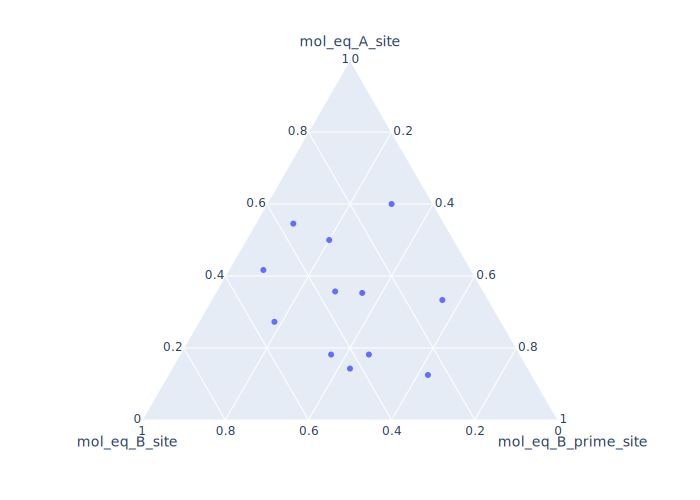

In [138]:
import plotly.express as px
# Select a single set of solvent, a site, and concentration conditions
df_ternary = df_subsample.loc[(df['A_site_source']=='MABr') & (df['total_concentration']==0.8) & (df['solvent1']=='Water')]

fig = px.scatter_ternary(df_ternary,
                         a="mol_eq_A_site",
                         b="mol_eq_B_site",
                         c="mol_eq_B_prime_site")
fig.show(renderer="svg")


90


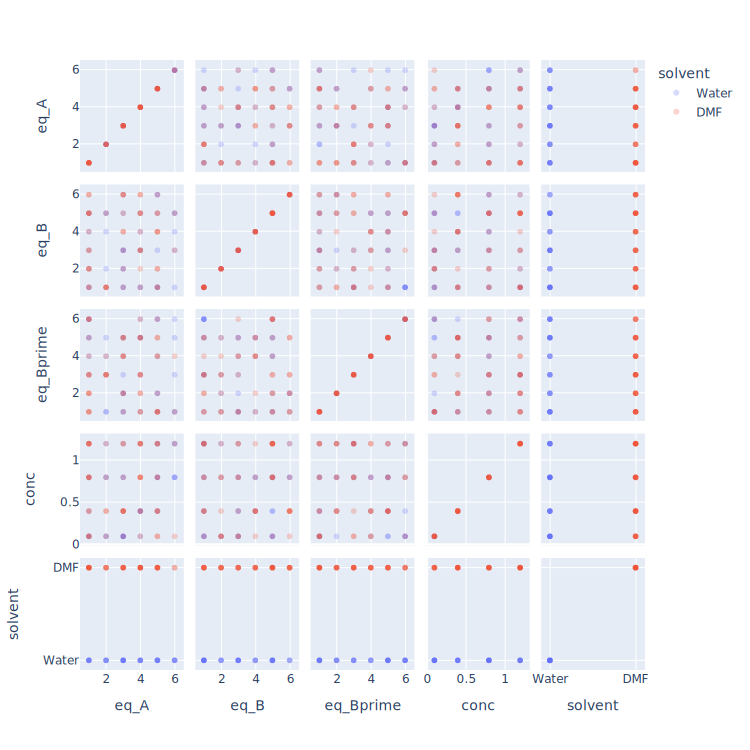

In [139]:
df_subsample = df.sample(frac=0.0125, random_state=1) 
df_matrix = df_subsample.loc[(df['A_site_source']=='MABr')]
print(len(df_matrix))

labels = {
    'mol_eq_A_site': 'eq_A', 
    'mol_eq_B_site': 'eq_B', 
    'mol_eq_B_prime_site': 'eq_Bprime', 
    'total_concentration': 'conc', 
    'solvent1': 'solvent'
}
fig = px.scatter_matrix(df_matrix, 
                  dimensions=['mol_eq_A_site', 
                              'mol_eq_B_site', 
                              'mol_eq_B_prime_site', 
                              'total_concentration', 
                              'solvent1'], 
                  labels = labels,
                  color='solvent1', opacity=0.25)
fig.update_layout(width=750, height=750)
fig.show(renderer="svg")

Water | total_concentration= 0.1


Water | total_concentration= 1.2


Water | total_concentration= 0.8


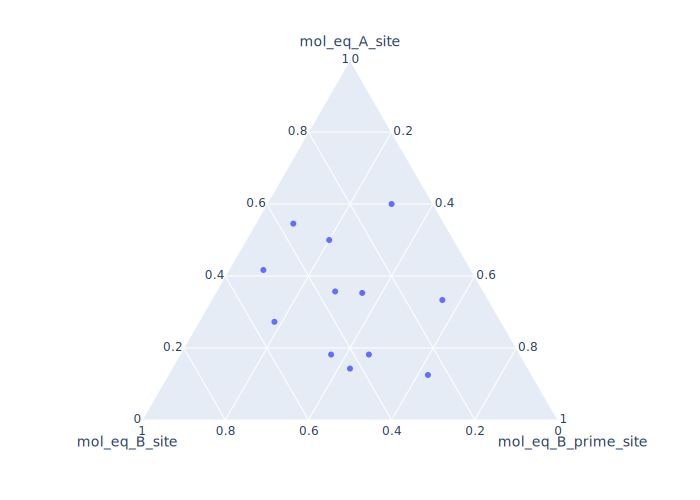

Water | total_concentration= 0.4


DMF | total_concentration= 0.1


DMF | total_concentration= 1.2


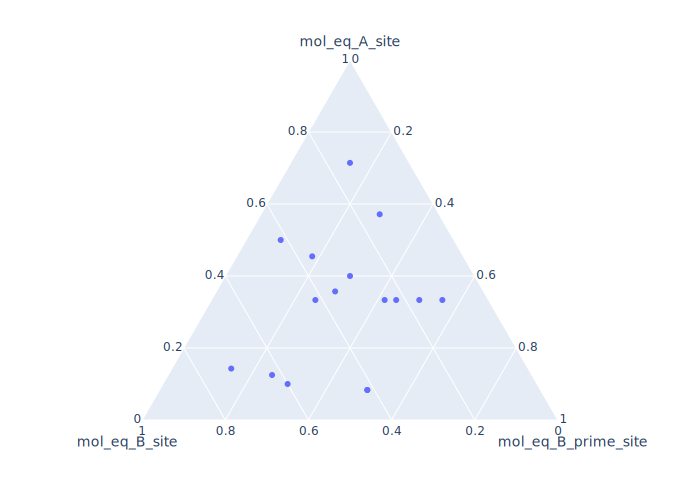

DMF | total_concentration= 0.8


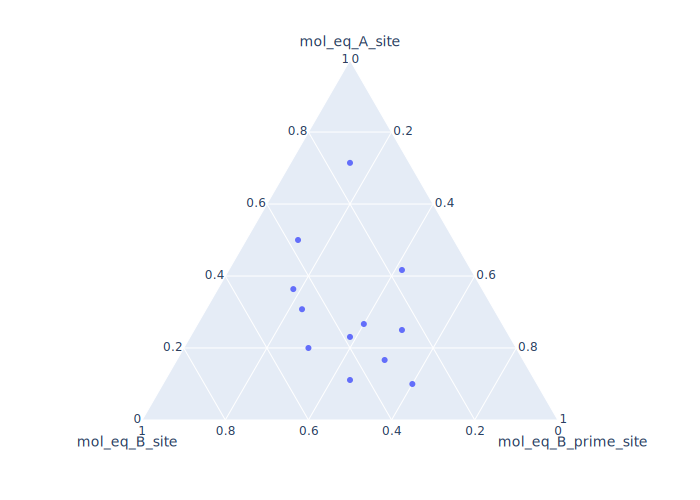

DMF | total_concentration= 0.4


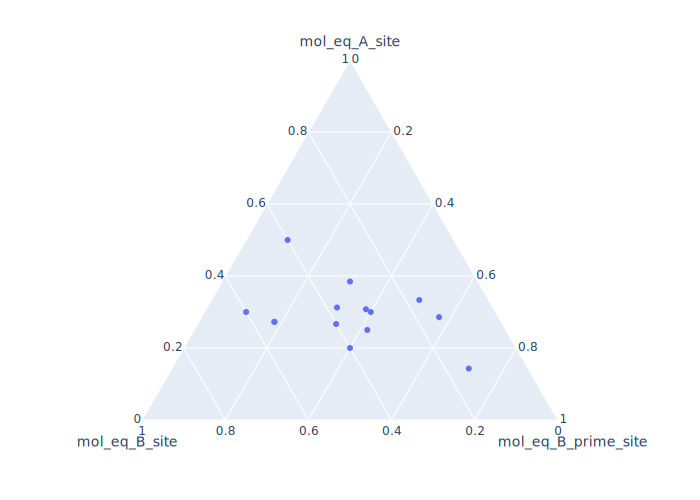

In [141]:

for i in df_subsample['solvent1'].unique():
    for j in df_subsample['total_concentration'].unique():
        df_ternary = df_subsample.loc[(df['A_site_source']=='MABr') & 
                                      (df['total_concentration']==j) & 
                                      (df['solvent1']==i)]
        fig = px.scatter_ternary(df_ternary, 
                                 a="mol_eq_A_site", 
                                 b="mol_eq_B_site", 
                                 c="mol_eq_B_prime_site")
        print(i, '| total_concentration=', j)
        fig.show(renderer="svg")
